In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
import plotly.offline as py
import plotly.figure_factory as ff
import seaborn as sns

plt.style.use("seaborn-dark")

In [4]:
df = pd.read_csv("dataset/credit-card.csv")
#py.iplot(ff.create_table(df.head(5)))

df = df.dropna()
df = df.reset_index(drop=True)
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


Text(0, 0.5, 'Customer Count')

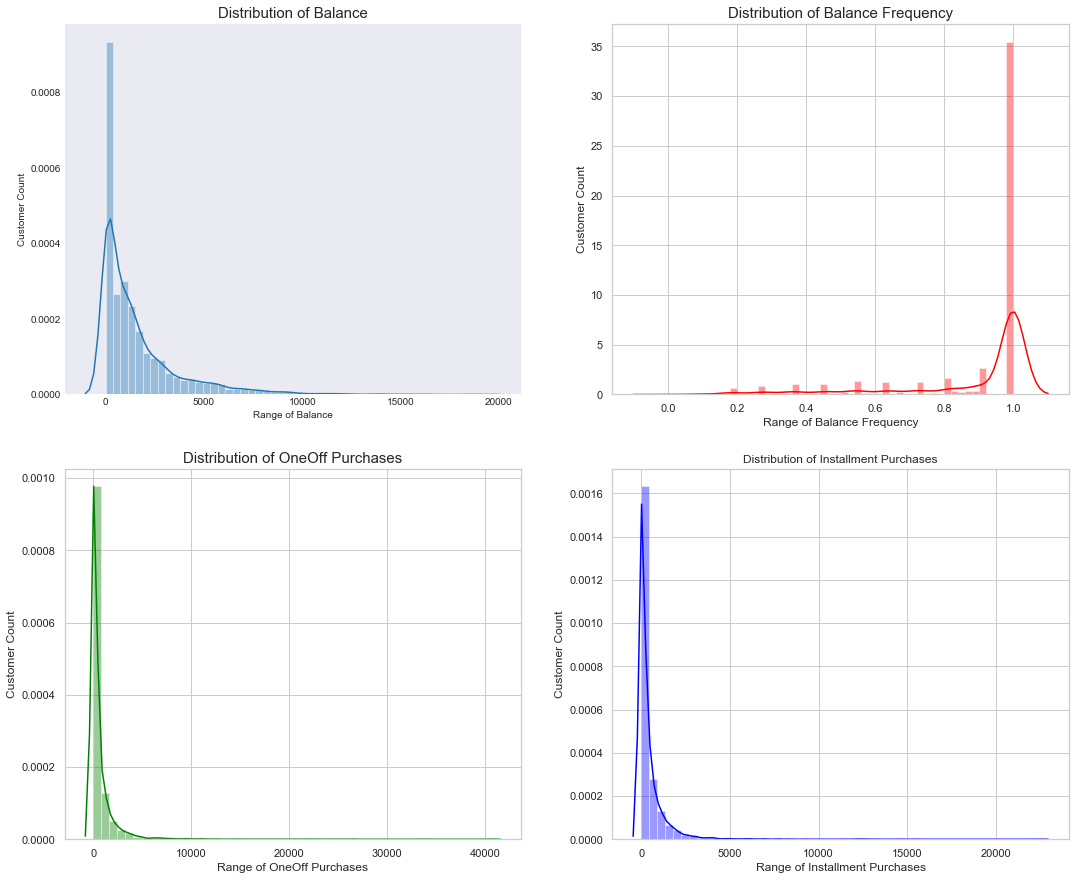

In [5]:
plt.rcParams['figure.figsize'] = (18,15)

plt.subplot(2, 2, 1)
sns.set(style="whitegrid")
sns.distplot(df['BALANCE'])
plt.title("Distribution of Balance", fontsize=15)
plt.xlabel("Range of Balance")
plt.ylabel("Customer Count")


plt.subplot(2, 2, 2)
sns.set(style='whitegrid')
sns.distplot(df['BALANCE_FREQUENCY'], color="red")
plt.title("Distribution of Balance Frequency", fontsize=15)
plt.xlabel("Range of Balance Frequency")
plt.ylabel("Customer Count")


plt.subplot(2, 2, 3)
sns.set(style="whitegrid")
sns.distplot(df['ONEOFF_PURCHASES'], color="green")
plt.title("Distribution of OneOff Purchases", fontsize=15)
plt.xlabel("Range of OneOff Purchases")
plt.ylabel("Customer Count")

plt.subplot(2, 2, 4)
sns.set(style="whitegrid")
sns.distplot(df['INSTALLMENTS_PURCHASES'], color="blue")
plt.title("Distribution of Installment Purchases")
plt.xlabel("Range of Installment Purchases")
plt.ylabel("Customer Count")

----
Here, in the above plots we can see the Distribution pattern of Balance, Balance Frequency, OneOff Purchases and Installment Purchases  

__Balance Distribution__
>_We can infer one thing that most customers have balance lower than five thousands and very few has above 15 thousands or more._

__Balance Frequency Distribution__
>_From the graph, we can see that majority of customers frequently changes their balance._

__OneOff Purchases Distribution__
>_The data shows that majority of customers does not pay the amount in one go. There are some customer who do pay in one go but the amount is lower than five thousands in most cases. Therefore, customers only pay small amount in one go._

__Installment Purchases__
>_Again, similar to the previous graph, most customers does not pay the amount in installments. Which lead us to the conclusion that, they change their balance using other methods such as debit or direct payment._

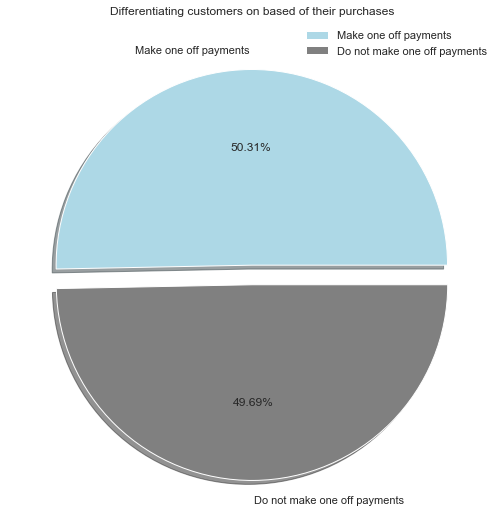

In [21]:
zero_one_off = df['ONEOFF_PURCHASES'].value_counts()[0]
other_one_off = np.sum(df['ONEOFF_PURCHASES'].value_counts()[1:])
labels = ["Make one off payments", "Do not make one off payments"]
size = [zero_one_off, other_one_off]
color=['lightblue','gray']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors=color, explode=explode, labels = labels, shadow=True, autopct = "%.2f%%")
plt.title("Differentiating customers on based of their purchases")
plt.legend()
plt.show()

_The above data shows that half of customers do not make one off payments_


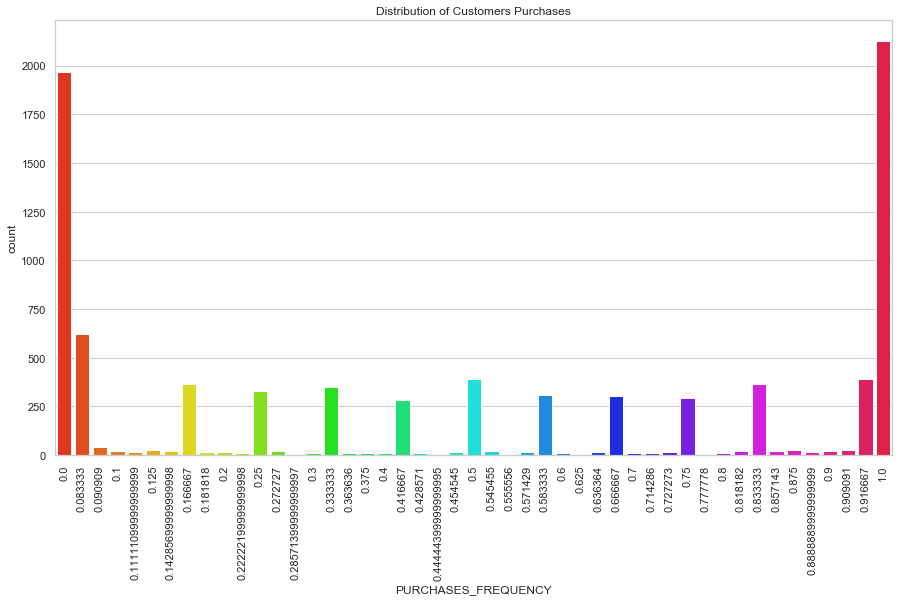

In [23]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['PURCHASES_FREQUENCY'], palette = 'hsv')
plt.title("Distribution of Customers Purchases")
plt.xticks(rotation=90)
plt.show()

----
From the above graph, we can see that majority of customers fall in two categories - who make purchases very frequently, and who does not make any purchases. These are two main type of customers that the company has.

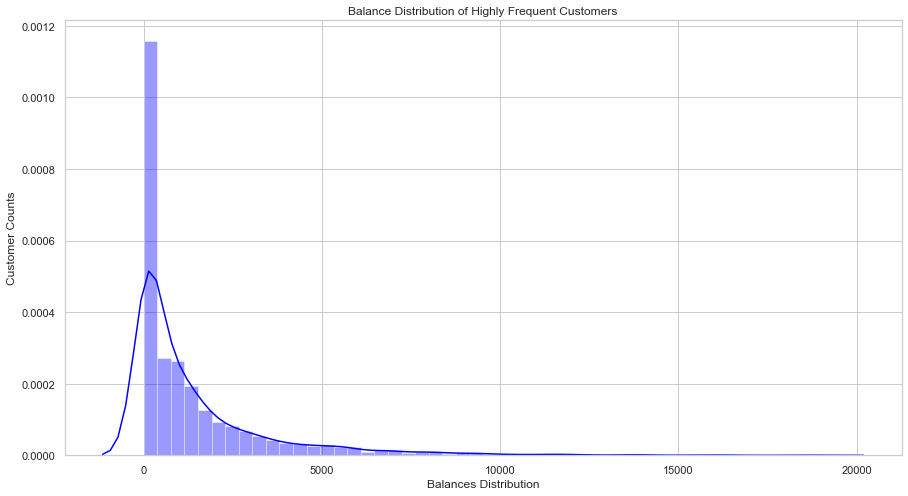

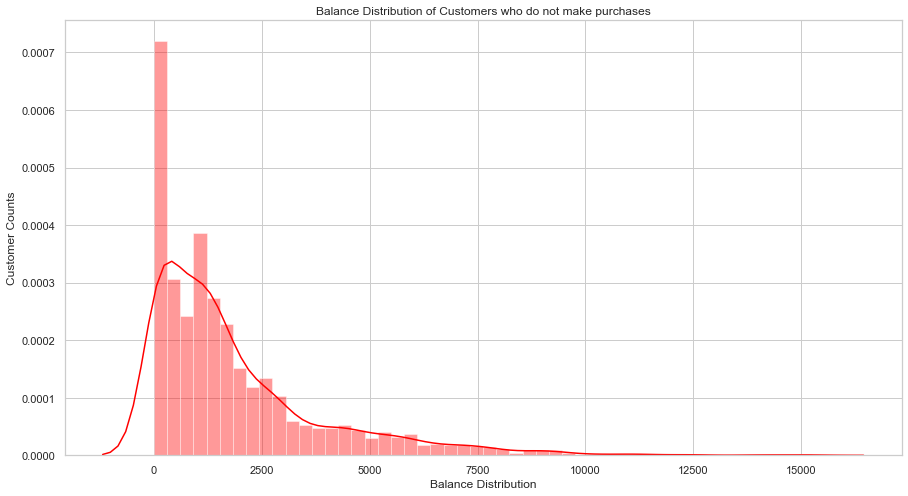

In [45]:
high_purchase_frequency = df[df['INSTALLMENTS_PURCHASES'] >= 1.0]
low_purchase_frequency = df[df['INSTALLMENTS_PURCHASES'] == 0.0]

sns.set(style="whitegrid")
sns.distplot(high_purchase_frequency['BALANCE'], color="blue")
plt.title("Balance Distribution of Highly Frequent Customers")
plt.xlabel("Balances Distribution")
plt.ylabel("Customer Counts")
plt.show()

sns.set(style="whitegrid")
sns.distplot(low_purchase_frequency['BALANCE'], color="red")
plt.title("Balance Distribution of Customers who do not make purchases")
plt.xlabel("Balance Distribution")
plt.ylabel("Customer Counts")
plt.show()

-----
From the above two graphs, we can see that the common trend is that most of the customers do not have any balance. Moreoever, customers who do not make purchases tend to have more balance than highly frequent customers.

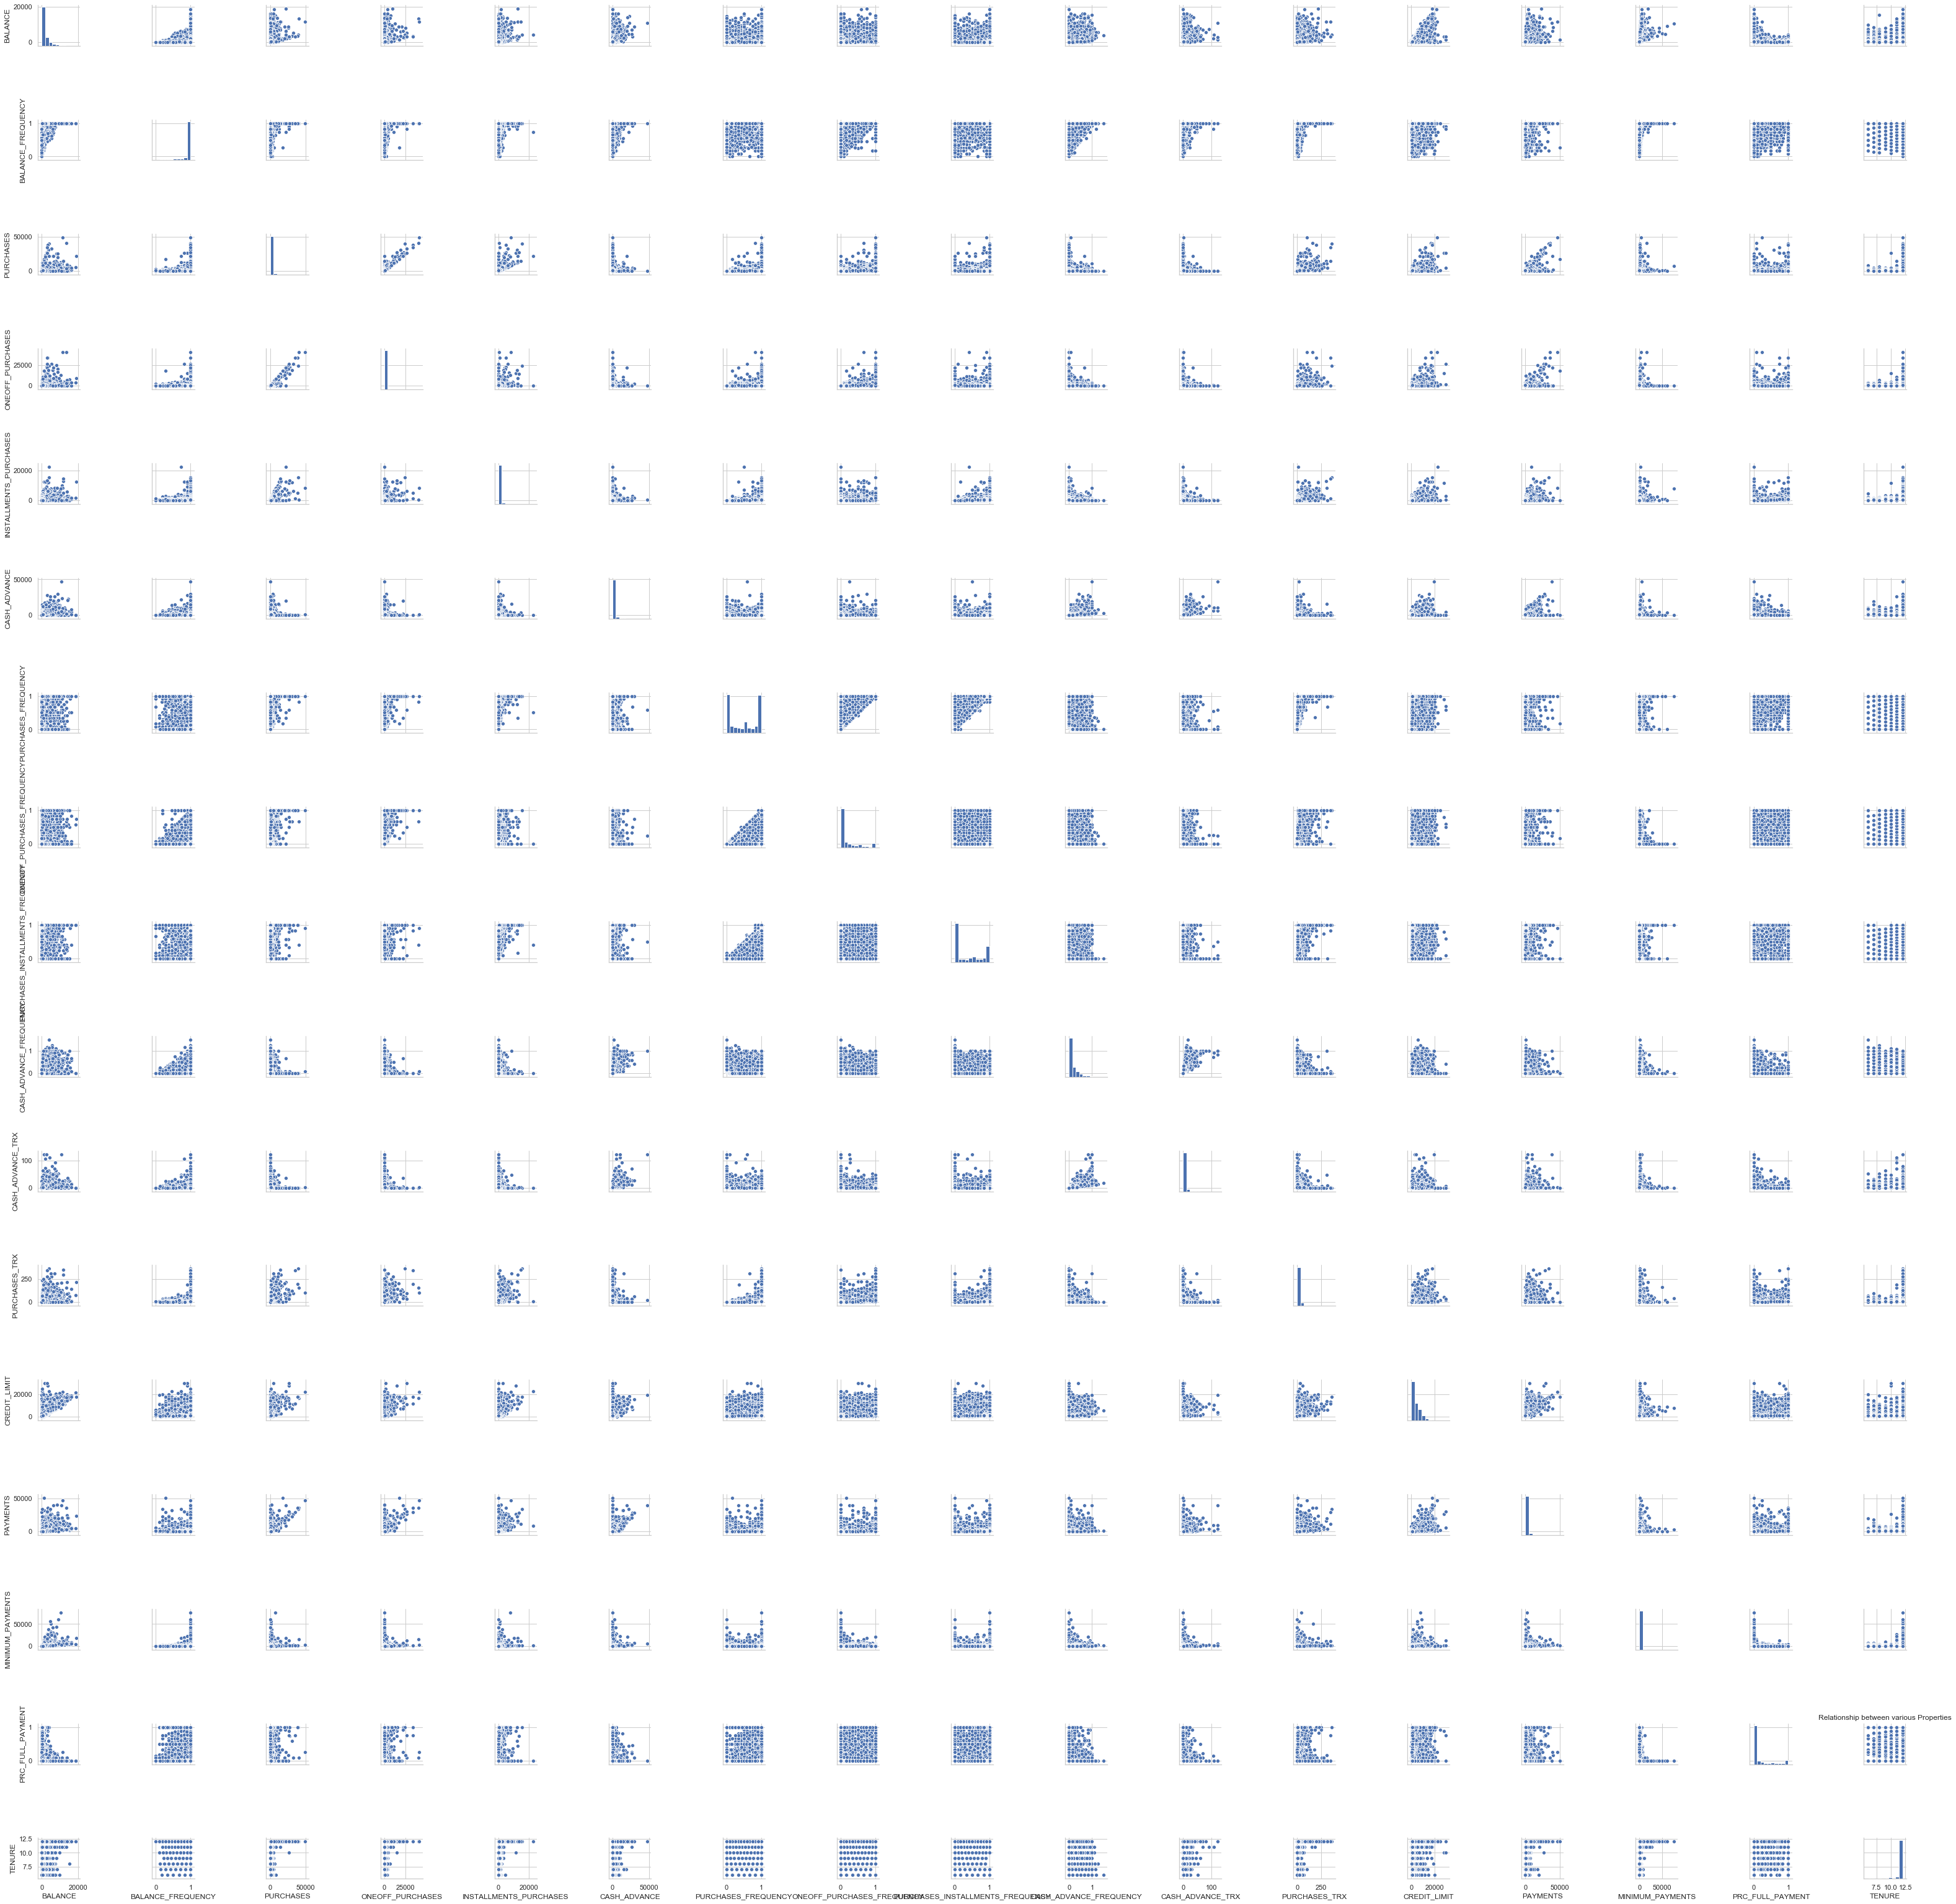

In [44]:
sns.pairplot(df)
plt.title("Relationship between various Properties")
plt.show()

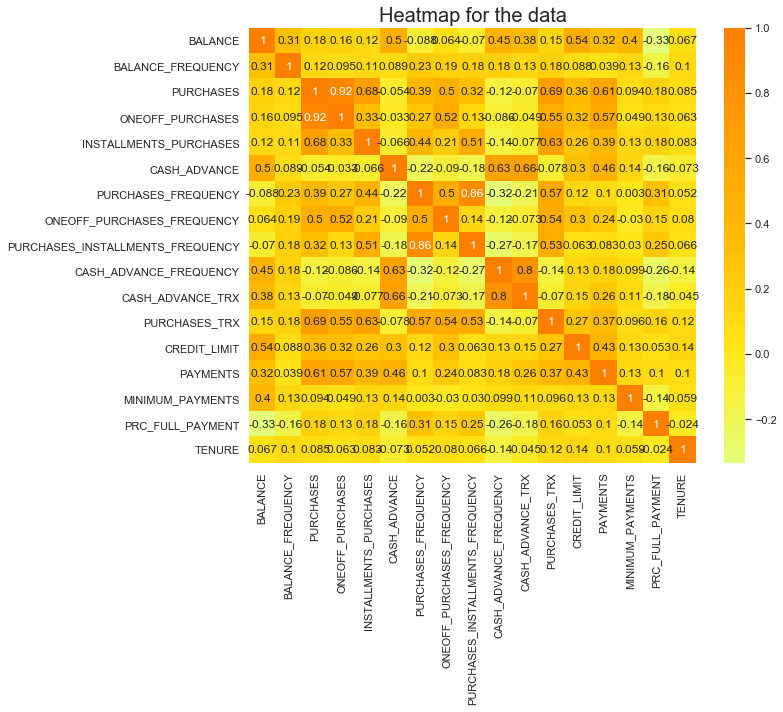

In [47]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(df.corr(), cmap='Wistia', annot=True)
plt.title("Heatmap for the data", fontsize=20)
plt.show()

----
The Above Graph shows the correlation between different attributes of Credit Card Customers. This heat map reflects the most correlated features with Orange Color and least correlated features with Yellow color.
> We can clearly see that these attributes do not have good correlation among them, that's why will proceed with all the features.

### Partition Clustering 

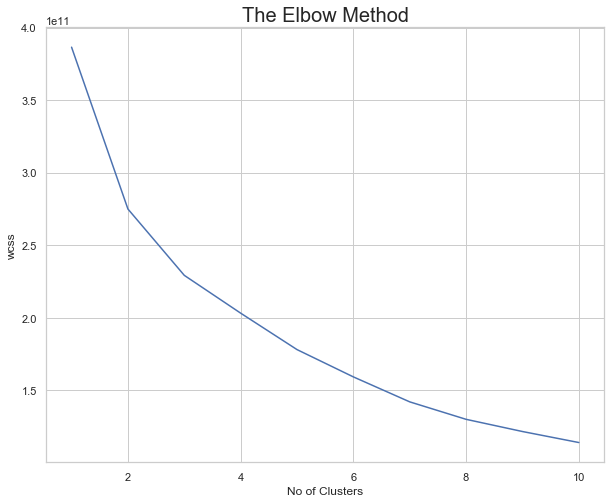

In [61]:
from sklearn.cluster import KMeans

cols = list(df.columns)
cols.pop(0)

df_2 = df[cols]

score_list = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', max_iter=200, random_state=20)
    model.fit(df_2)
    score_list.append(model.inertia_)
    
plt.plot(range(1, 11), score_list)
plt.title("The Elbow Method", fontsize=20)
plt.xlabel("No of Clusters")
plt.ylabel("wcss")
plt.show()

----
By using The Elbow method we can see the best value for number of clusters that exist in this dataset. Therefore, n_clusters = 2

In [63]:
model = KMeans(n_clusters=2, max_iter=200, random_state=0)
y_means = model.fit_predict(df_2)
df['Clus_Type'] = y_means
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clus_Type
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0


In [69]:
df.groupby('Clus_Type').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Clus_Type,,,,,,,,,,,,,,,,,
0,978.043718,0.881433,646.170702,338.443883,308.013516,550.277597,0.477516,0.166972,0.356986,0.112517,2.396057,11.338385,3068.290950,1075.945986,610.342843,0.161298,11.476681
1,3904.521491,0.945309,2427.202110,1589.736678,837.866710,2634.835773,0.564316,0.349820,0.412560,0.230328,6.706362,28.689505,9895.380394,4403.234365,1802.956599,0.151932,11.747689


----
From the above results, we can see that the company has two types of customers - High value customers who has high balance in their account, make higher payments/purchases, and low value customers who has low balance, make lower amount of payments or purchases.

In [70]:
df.groupby("Clus_Type").count()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Clus_Type,,,,,,,,,,,,,,,,,,
0,6797,6797,6797,6797,6797,6797,6797,6797,6797,6797,6797,6797,6797,6797,6797,6797,6797,6797
1,1839,1839,1839,1839,1839,1839,1839,1839,1839,1839,1839,1839,1839,1839,1839,1839,1839,1839


----
However, majority of customers fall in second band, which is low-value customers who has low balance in their account. 

In [75]:
plt.scatter(df[df['Clus_Type'] == 0]['CUST_ID'], df[df['Clus_Type'] == 0]['BALANCE'], s= 100, c="pink", label='Low-Value Customers')
plt.scatter(df[df['Clus_Type'] == 1]['CUST_ID'], df[df['Clus_Type'] == 1]['BALANCE'], s= 100, c="red", label='High-Value Customers')
plt.style.use("fivethirtyeight")
plt.title("K Means Clustering", fontsize= 20)
plt.xlabel("CustomerId")
plt.ylabel("Balances")
plt.legend()
plt.grid()
plt.show()

KeyboardInterrupt: 

### Hierachical Clustering 


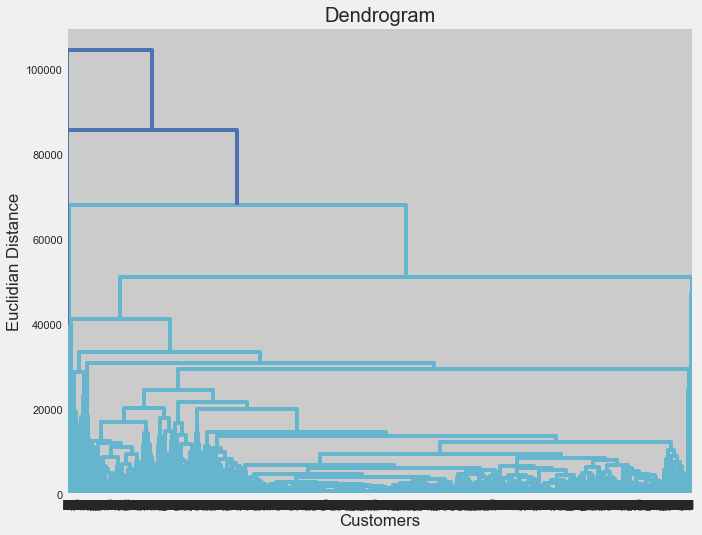

In [78]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df_2, method="complete"))
plt.title("Dendrogram", fontsize=20)
plt.xlabel("Customers")
plt.ylabel("Euclidian Distance")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

model = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage='ward')
y_hc = model.fit_predict(df_2)
df2 = df
df2['Clus_Type'] = y_hc
plt.scatter(df[df['Clus_Type'] == 0]['CUST_ID'], df[df['Clus_Type'] == 0]['BALANCE'], c = 'blue', label="Low-valued Custoemrs")
plt.scatter(df[df['Clus_Type'] == 1]['CUST_ID'], df[df['Clus_Type'] == 1]['BALANCE'], c = 'red' , label="High-valued Custoemrs")
plt.title("Hierarchical clustering - Agglomerative")
plt.xlabel("Customers")
plt.ylabel("Balances")
plt.legend()
plt.show()

In [ ]:
color = ['r', 'b']
for color, index in zip(color, range(len(model.labels_))):
    cluster = df2[df2['Clus_Type'] == index]
    plt.scatter(df2['CUST_ID'], df2['BALANCE'], color=color)
    plt.xlabel("Customers")
    plt.ylabel("Balances")
    plt.xticks(rotation=90)
    plt.show()         